In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("2020-Feb.csv")

In [3]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-02-01 00:00:01 UTC,cart,5844305,1487580006317032337,NaN,NaN,2.14,485174092,4be9643a-420b-4c6b-83dd-a15e772fbf7a
1,2020-02-01 00:00:03 UTC,view,5769925,1487580013841613016,NaN,kapous,4.22,594621622,a88baf11-9cd0-4362-bde4-1bfeed3f641d
2,2020-02-01 00:00:08 UTC,view,5817765,1487580008246412266,NaN,zeitun,11.03,495404942,3a569c8d-d848-4f09-a925-33f673d84c46
3,2020-02-01 00:00:11 UTC,view,5877033,1487580010100293687,NaN,milv,3.49,564814969,7feb39e5-bb7b-4b2b-a546-3e3b7c56326e
4,2020-02-01 00:00:12 UTC,cart,5814871,1487580008112194531,NaN,zinger,2.54,551205603,106a7c7f-7fa1-4463-8bec-0ea7b02191cb


In [4]:
data['event_time'] =pd.to_datetime(data['event_time'], format="%Y-%m-%d %H:%M:%S UTC")

In [5]:
data['product_id'].nunique()

48579

In [6]:
data['event_type'].value_counts()

view                1953586
cart                1148694
remove_from_cart     812409
purchase             241993
Name: event_type, dtype: int64

In [7]:
data['date'] = data['event_time'].dt.round("1H")

In [9]:
pur = data[data['event_type']=='purchase']

In [11]:
pur.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,date
117,2020-02-01 00:08:22,purchase,5678411,1487580013841613016,NaN,estel,2.62,278482846,ac0cda7a-f372-4ad3-90c7-7357128a4771,2020-02-01
118,2020-02-01 00:08:22,purchase,5686925,1487580009311764506,NaN,NaN,0.35,278482846,ac0cda7a-f372-4ad3-90c7-7357128a4771,2020-02-01
119,2020-02-01 00:08:22,purchase,5696187,1487580005134238553,NaN,runail,2.14,278482846,ac0cda7a-f372-4ad3-90c7-7357128a4771,2020-02-01
120,2020-02-01 00:08:22,purchase,5727535,1487580004882580302,NaN,NaN,2.70,278482846,ac0cda7a-f372-4ad3-90c7-7357128a4771,2020-02-01
121,2020-02-01 00:08:22,purchase,5804604,1487580005461394279,NaN,bluesky,3.97,278482846,ac0cda7a-f372-4ad3-90c7-7357128a4771,2020-02-01


In [12]:
g=pur.groupby(['date'], as_index=False)['price'].sum()

In [13]:
g.head()

,date,price
0,2020-02-01 00:00:00,28.60
1,2020-02-01 01:00:00,122.84
2,2020-02-01 02:00:00,112.87
3,2020-02-01 03:00:00,357.20
4,2020-02-01 04:00:00,642.56


In [14]:
g = g.rename(columns={'price':'sales_value'})

<AxesSubplot:xlabel='date'>

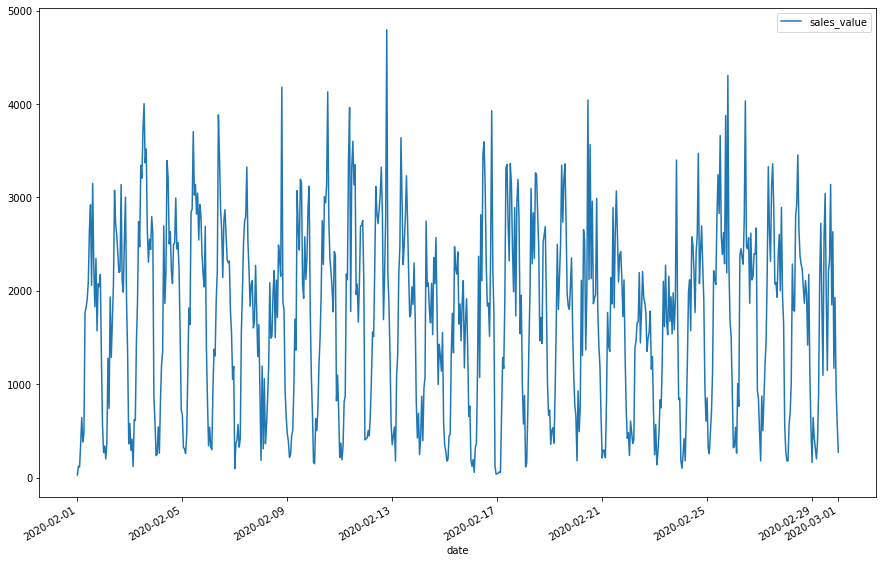

In [16]:
g.plot(x='date', y='sales_value', figsize=(15,10))

In [ ]:
#convolução vetor (produto escalar) com uma parte da serie
#filtro numero de transformaçoes, kernel tamanho da convulução( kernel = 3 -existem 3 elementos) faz o delizamento, delizar 2 elementos 1 
#de acordo com stride
#deslizar pela serie vafendo transformações nas informações originais # lag, diff, rolling ag

In [17]:
g.to_csv('ts_hr_feb_2020.csv.zip',index=False, header=True)